<a href="https://colab.research.google.com/github/209sontung/machine-learning/blob/main/Week_8_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.genfromtxt('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv',
                     delimiter=',', skip_header=1, encoding='utf-8')

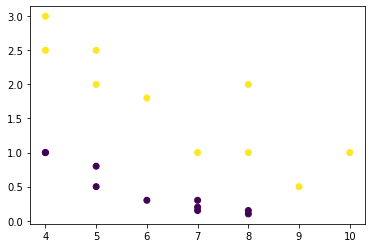

In [30]:
X = data[:,:2]
y = data[:, -1]
plt.scatter(X[:,0], X[:,1], c=y)

In [32]:
def calculate_gini(n1, n2):
    if n1+n2 == 0: 
        return 1
    else: 
        return 1 - (n1/(n1+n2))**2 - (n2/(n1+n2))**2
        
g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
g1

0.5

In [57]:
G = {}
listOfKeys = []
for var in range(X.shape[1]):
  sorted = np.unique(np.sort(X[:, var]))
  for i in np.convolve(sorted, np.ones(2), 'valid') / 2:

      indx_below = np.where(X[:, var] <= i)
      y_below = y[indx_below]
      g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

      indx_above = np.where(X[:, var] > i)
      y_above = y[indx_above]
      g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

      gini_index = g1 - g2 * y_below.shape[0] / y.shape[0] - g3 * y_above.shape[0] / y.shape[0]
      
      G[i] = gini_index
  gini_index_max = max(G.items(), key=lambda x: x[1])
  for key, value in G.items():
      if value == gini_index_max[1]:
          listOfKeys.append(key)
listOfKeys


[8.5, 0.9]

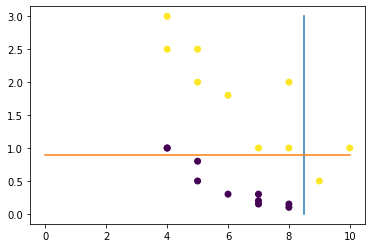

In [70]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([listOfKeys[0], listOfKeys[0]],[0, max(X[:,1])])
plt.plot([0,  max(X[:,0])],[listOfKeys[1],listOfKeys[1]])

In [68]:
max(X[:,0])

10.0